<a href="https://colab.research.google.com/github/jialubio/Bla_ProteinEmbedding/blob/main/WSJ_Public_LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Adjusting the BASE_URL format to match the provided structure
BASE_URL = "https://www.wsj.com/market-data/quotes/company-list/sector/biotechnology/{}"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

MAX_PAGES = 50  # Setting a safety limit for number of pages to scrape

def extract_companies_from_page(soup):
    companies = []
    for row in soup.find_all('tr'):
        # Make sure the row has the expected structure
        name_tag = row.find('span', class_='cl-name')
        if not name_tag:
            continue

        # Extracting company name
        name = name_tag.text.strip()

        # Extracting country and exchange
        columns = [td.text.strip() for td in row.find_all('td')]
        if len(columns) < 3:
            continue

        country, exchange = columns[1], columns[2]

        companies.append({
            'NAME': name,
            'COUNTRY': country,
            'EXCHANGE': exchange
        })
    return companies

all_companies = []
page_num = 1

while page_num <= MAX_PAGES:
    print('page --- ', page_num)
    response = requests.get(BASE_URL.format(page_num), headers=headers)

    if response.status_code != 200:
        break

    soup = BeautifulSoup(response.content, 'html.parser')
    companies = extract_companies_from_page(soup)

    # Check if the page has any companies. If not, break the loop.
    if not companies:
        break

    all_companies.extend(companies)
    page_num += 1

    # Introduce a delay of 2 seconds between requests
    time.sleep(2)

# Convert the list of dictionaries into a DataFrame
df_biotech = pd.DataFrame(all_companies)

# Display the table
print(df_biotech[df_biotech['COUNTRY'] == 'United States'])


page ---  1
page ---  2
page ---  3
page ---  4
page ---  5
page ---  6
page ---  7
page ---  8
page ---  9
page ---  10
page ---  11
                               NAME        COUNTRY EXCHANGE
0                 10x Genomics Inc.  United States     XNAS
1           180 Life Sciences Corp.  United States     XNAS
2           22nd Century Group Inc.  United States     XNAS
3               23andMe Holding Co.  United States     XNAS
4                        2Invest AG  United States     XETR
...                             ...            ...      ...
1415           Zenith Capital Corp.  United States     OOTC
1416  Zentalis Pharmaceuticals Inc.  United States     XNAS
1418                  Zura Bio Ltd.  United States     XNAS
1419                 Zymeworks Inc.  United States     XNAS
1420      ZyVersa Therapeutics Inc.  United States     XNAS

[776 rows x 3 columns]


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Adjusting the BASE_URL format to match the provided structure
BASE_URL = "https://www.wsj.com/market-data/quotes/company-list/sector/pharmaceuticals/{}"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

MAX_PAGES = 50  # Setting a safety limit for number of pages to scrape

def extract_companies_from_page(soup):
    companies = []
    for row in soup.find_all('tr'):
        # Make sure the row has the expected structure
        name_tag = row.find('span', class_='cl-name')
        if not name_tag:
            continue

        # Extracting company name
        name = name_tag.text.strip()

        # Extracting country and exchange
        columns = [td.text.strip() for td in row.find_all('td')]
        if len(columns) < 3:
            continue

        country, exchange = columns[1], columns[2]

        companies.append({
            'NAME': name,
            'COUNTRY': country,
            'EXCHANGE': exchange
        })
    return companies

all_companies = []
page_num = 1

while page_num <= MAX_PAGES:
    print('page --- ', page_num)
    response = requests.get(BASE_URL.format(page_num), headers=headers)

    if response.status_code != 200:
        break

    soup = BeautifulSoup(response.content, 'html.parser')
    companies = extract_companies_from_page(soup)

    # Check if the page has any companies. If not, break the loop.
    if not companies:
        break

    all_companies.extend(companies)
    page_num += 1

    # Introduce a delay of 2 seconds between requests
    time.sleep(2)

# Convert the list of dictionaries into a DataFrame
df_pharma = pd.DataFrame(all_companies)

# Display the table


page ---  1
page ---  2
page ---  3
page ---  4
page ---  5
page ---  6
page ---  7
page ---  8
page ---  9
page ---  10
page ---  11
page ---  12
page ---  13
page ---  14
page ---  15
                                         NAME        COUNTRY EXCHANGE
0                                  1606 Corp.  United States     OOTC
1                                    1CM Inc.  United States     OOTC
5                     9 Meters Biopharma Inc.  United States     XNAS
12                        Abbott Laboratories  United States     XNYS
13                        Abbott Laboratories  United States     XETR
...                                       ...            ...      ...
2037  Zhong Yuan Bio-Technology Holdings Ltd.  United States     OOTC
2043                     Zivo Bioscience Inc.  United States     XNAS
2046                              Zoetis Inc.  United States     XNYS
2047                           Zomedica Corp.  United States     XASE
2050             Zynerba Pharmaceuticals Inc

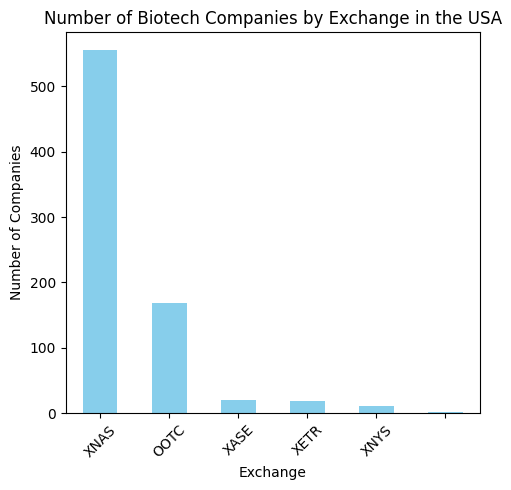

In [ ]:
df_biotech_usa= df_biotech[df_biotech['COUNTRY'] == 'United States']
import matplotlib.pyplot as plt

# Group by 'EXCHANGE' column and count the number of companies for each exchange
exchange_counts = df_biotech_usa['EXCHANGE'].value_counts()

# Plotting
plt.figure(figsize=(5,5))
exchange_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Biotech Companies by Exchange in the USA")
plt.xlabel("Exchange")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


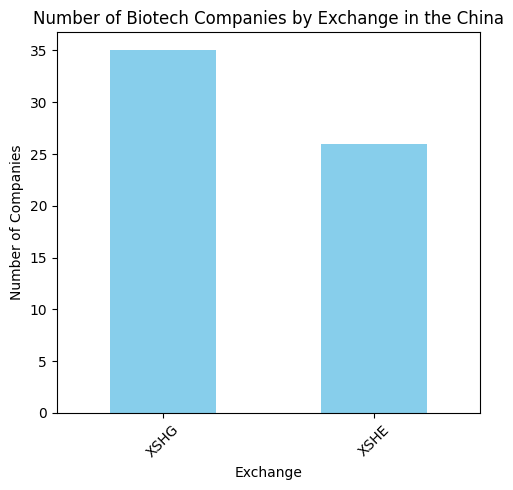

In [ ]:
df_biotech_china= df_biotech[df_biotech['COUNTRY'] == 'China']
import matplotlib.pyplot as plt

# Group by 'EXCHANGE' column and count the number of companies for each exchange
exchange_counts = df_biotech_china['EXCHANGE'].value_counts()

# Plotting
plt.figure(figsize=(5,5))
exchange_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Biotech Companies by Exchange in the China")
plt.xlabel("Exchange")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


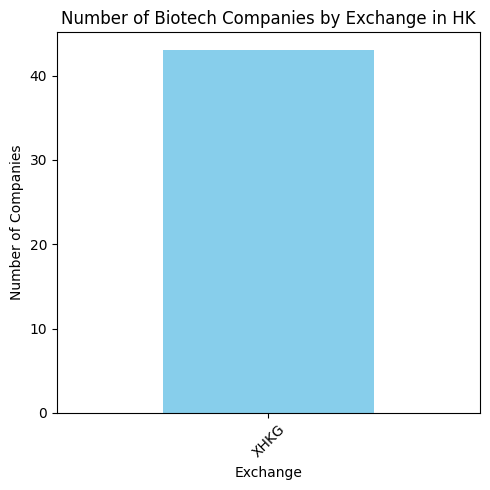

In [ ]:
df_biotech_hk= df_biotech[df_biotech['COUNTRY'] == 'Hong Kong']
import matplotlib.pyplot as plt

# Group by 'EXCHANGE' column and count the number of companies for each exchange
exchange_counts = df_biotech_hk['EXCHANGE'].value_counts()

# Plotting
plt.figure(figsize=(5,5))
exchange_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Biotech Companies by Exchange in HK")
plt.xlabel("Exchange")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


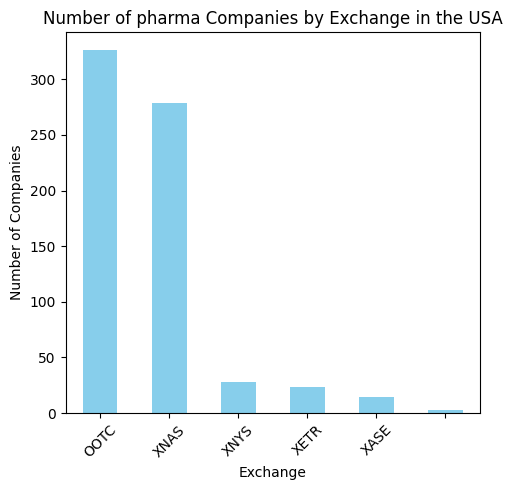

In [ ]:
df_pharma_usa = df_pharma[df_pharma['COUNTRY'] == 'United States']

# Group by 'EXCHANGE' column and count the number of companies for each exchange
exchange_counts = df_pharma_usa['EXCHANGE'].value_counts()

# Plotting
plt.figure(figsize=(5,5))
exchange_counts.plot(kind='bar', color='skyblue')
plt.title("Number of pharma Companies by Exchange in the USA")
plt.xlabel("Exchange")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

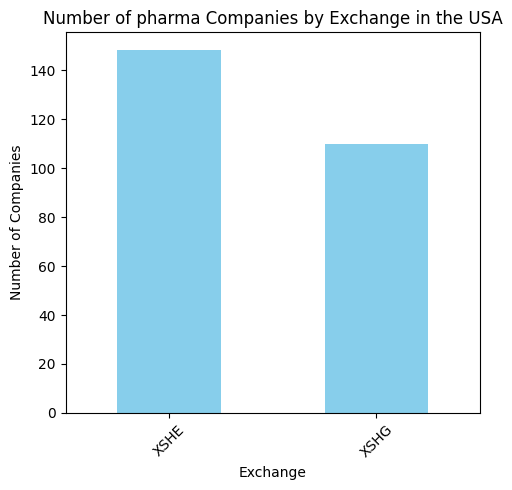

In [ ]:
df_pharma_china = df_pharma[df_pharma['COUNTRY'] == 'China']

# Group by 'EXCHANGE' column and count the number of companies for each exchange
exchange_counts = df_pharma_china['EXCHANGE'].value_counts()

# Plotting
plt.figure(figsize=(5,5))
exchange_counts.plot(kind='bar', color='skyblue')
plt.title("Number of pharma Companies by Exchange in the China")
plt.xlabel("Exchange")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

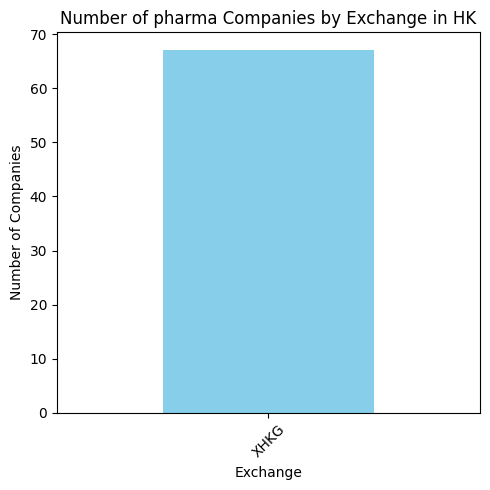

In [ ]:
df_pharma_hk = df_pharma[df_pharma['COUNTRY'] == 'Hong Kong']

# Group by 'EXCHANGE' column and count the number of companies for each exchange
exchange_counts = df_pharma_hk['EXCHANGE'].value_counts()

# Plotting
plt.figure(figsize=(5,5))
exchange_counts.plot(kind='bar', color='skyblue')
plt.title("Number of pharma Companies by Exchange in HK")
plt.xlabel("Exchange")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()